In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [354]:
filepath = 'Res_HAE_LS_KroB200.json'

In [355]:
with open(filepath) as json_data:
    d = json.load(json_data)
    json_data.close()

In [356]:
_, method_sign, pick_method, instance = filepath.split('_') # Przykładowa ścieżka: RES_RAND_FLS_KroB200

In [357]:
X = []
Y = []
for i in d['unordered nodes']:
    X.append(i['X'])
    Y.append(i['Y'])

In [368]:
option = "best order"
match method_sign:
    case "NN":
      method = "Najbliższy Sąsiad"
    case "GC":
      method = "Zachłanny Cykl"
    case "REG":
      method = "Żal"  
    case "RAND":
      method = "Losową"
    case _:
      method = "unknown"
match option:
    case "best order":
        which_order = "Najlepszy cykl"
    case "worst order":
        which_order = "Najgorszy cykl"
    case _:
        which_order = "unknown"
match pick_method:
    case "SE":
        pick = "Steepest Edge"
    case "SN":
      pick = "Steepest Node"
    case "GE":
      pick =  "Greedy Edge"
    case "GN":
      pick = "Greedy Node"
    case "RW":
      pick = "Random Walk"
    case "FLS":
      pick = "Fast Local Search"
    case "C":
      pick = "Ruchy kandydackie"
    case "MSLS"|"MLSL":
      pick = "MSLS"
    case "ILS":
      pick = "ILS"
    case "LNS":
      pick = "LNS bez przeszukiwania"
    case "LNS-LS":
      pick = "LNS z przeszukiwaniem"
    case "LS":
      pick = "HAE z przeszukiwaniem"
    case "NoLS":
      pick = "HAE bez przeszukiwania"


In [369]:
iterations = d["iterations"]

In [370]:
cycle1 = d[option][0]
#cycle1_base = d["start "+option][0]
cycle2 = d[option][1]
#cycle2_base = d["start "+option][1]

In [371]:
f = lambda x: [X[x], Y[x]]

In [372]:
cycle_1 = []
for i in cycle1:
    cycle_1.append(f(i))
cycle_1.append(cycle_1[0])
cycle_2 = []
for i in cycle2:
    cycle_2.append(f(i))
cycle_2.append(cycle_2[0])

In [373]:
from numpy.linalg import norm
n = len(d['unordered nodes'])
distance_matrix = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        distance_matrix[i,j] = np.round(norm(np.array([d['unordered nodes'][i]["X"]-d['unordered nodes'][j]["X"],d['unordered nodes'][i]["Y"]-d['unordered nodes'][j]["Y"]])))

In [374]:
def cycle_length(cycle, distance_matrix):
    cost = 0
    for i in range(len(cycle)):
        cost += distance_matrix[cycle[i],cycle[(i+1)%len(cycle)]]
    return int(cost)

In [375]:
cycle1_color = "#df2935"
cycle2_color = "#3772ff"

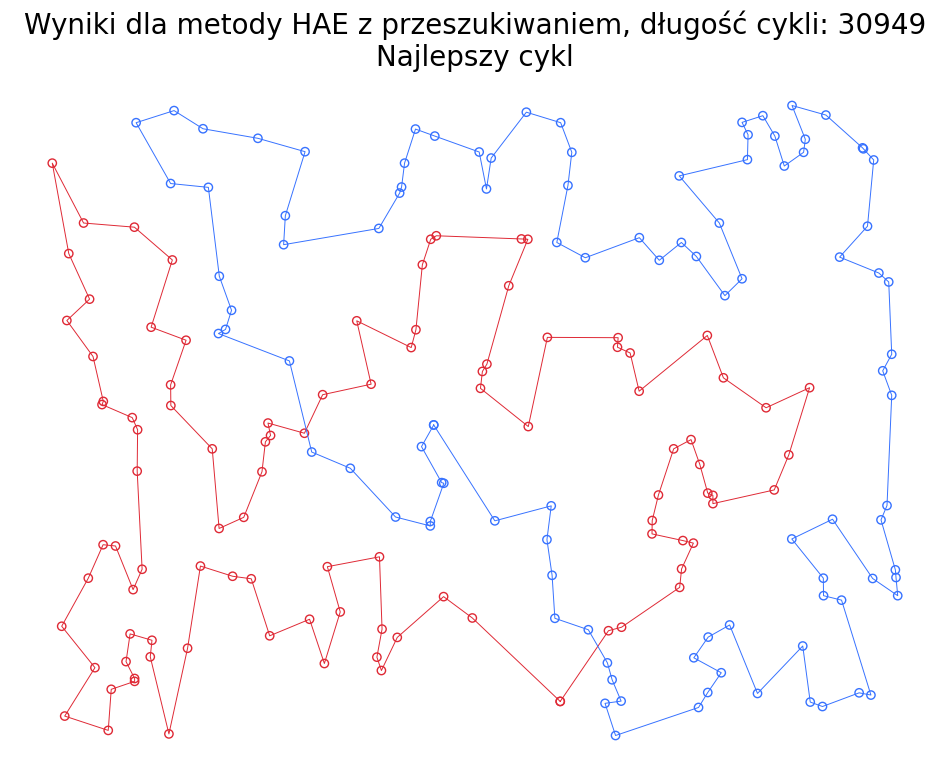

In [376]:
fig, ax = plt.subplots(figsize=(12,9))
plt.scatter(np.array(cycle_1).T[0],np.array(cycle_1).T[1], c="none", edgecolors=cycle1_color)
plt.scatter(np.array(cycle_2).T[0],np.array(cycle_2).T[1], c="none", edgecolors=cycle2_color)
plt.plot(np.array(cycle_1).T[0],np.array(cycle_1).T[1], c=cycle1_color, lw=0.7)
plt.plot(np.array(cycle_2).T[0],np.array(cycle_2).T[1], c=cycle2_color, lw=0.7)
plt.title(f"Wyniki dla metody {pick}, długość cykli: {cycle_length(cycle1, distance_matrix)+cycle_length(cycle2, distance_matrix)}\n{which_order}", fontsize=20)
nn = plt.axis(False)
fig.savefig(f"{method_sign}_{option}_{pick_method}_kroB.png",bbox_inches='tight', pad_inches=0.05)

In [377]:
cost_array = np.array(d['result'][0])+np.array(d['result'][1])
time_array = np.array(d['times'])

In [343]:
print(f"{method} {pick}")
print()
print(f"Długość łączna cykli:  {np.mean(cost_array)} ({np.min(cost_array)}-{np.max(cost_array)})")
print()
print(f"Czas: {np.mean(time_array):.2f} ({np.min(time_array):.2f}-{np.max(time_array):.2f})")
print()
print(f"Liczba iteracji: {np.mean(iterations):.1f} ({np.min(iterations)}-{np.max(iterations)})")


unknown HAE bez przeszukiwania

Długość łączna cykli:  32515.0 (31582-33245)

Czas: 28.33 (18.30-35.54)

Liczba iteracji: 959.4 (789-1302)
